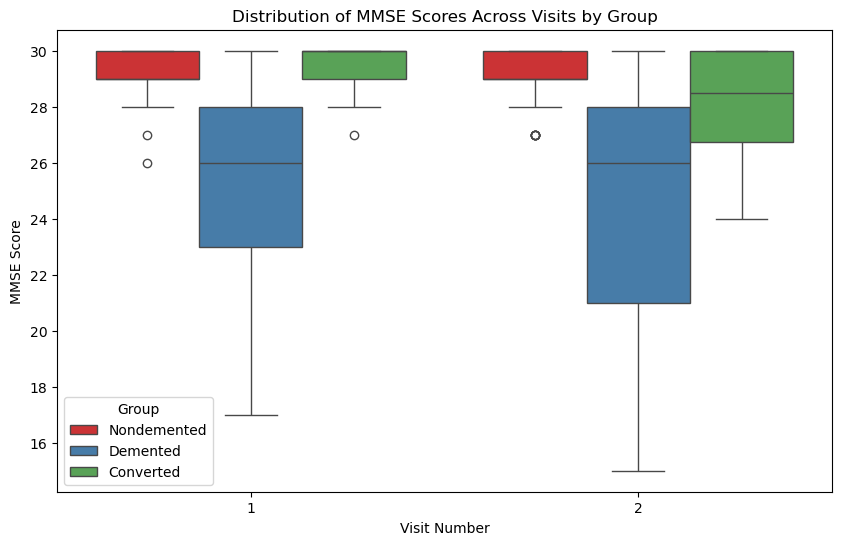

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('INF2178_A4_data.csv')
# Plotting the distribution of MMSE scores across visits for each group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Visit', y='MMSE', hue='Group', data=data, palette='Set1')
plt.title('Distribution of MMSE Scores Across Visits by Group')
plt.xlabel('Visit Number')
plt.ylabel('MMSE Score')
plt.legend(title='Group')
plt.show()


In [4]:
!pip install pingouin
import pingouin as pg

# Ensure 'Group' is a categorical variable and 'Visit' is treated as a repeated measure
data['Group'] = data['Group'].astype('category')
data['Visit'] = data['Visit'].astype('category')

# Perform the two-way mixed ANOVA
anova_results = pg.mixed_anova(dv='MMSE', within='Visit', between='Group', subject='Subject ID', data=data)
print(anova_results)


        Source           SS  DF1  DF2          MS          F         p-unc  \
0        Group  1328.421218    2  140  664.210609  56.212233  1.201604e-18   
1        Visit    22.377622    1  140   22.377622   8.859368  3.436529e-03   
2  Interaction    17.000403    2  140    8.500201   3.365255  3.737081e-02   

        np2  eps  
0  0.445379  NaN  
1  0.059515  1.0  
2  0.045870  NaN  


In [15]:
post_hocs = pg.pairwise_ttests(dv='MMSE', within='Visit', between='Group', subject='Subject ID', data=data)
print(post_hocs)

        Contrast Visit          A            B Paired Parametric         T  \
0          Visit     -          1            2   True       True  2.928096   
1          Group     -  Converted     Demented  False       True  6.738993   
2          Group     -  Converted  Nondemented  False       True -1.302773   
3          Group     -   Demented  Nondemented  False       True -9.448737   
4  Visit * Group     1  Converted     Demented  False       True  8.011725   
5  Visit * Group     1  Converted  Nondemented  False       True  0.488598   
6  Visit * Group     1   Demented  Nondemented  False       True -9.016012   
7  Visit * Group     2  Converted     Demented  False       True  4.547563   
8  Visit * Group     2  Converted  Nondemented  False       True -1.815516   
9  Visit * Group     2   Demented  Nondemented  False       True -8.463161   

          dof alternative         p-unc       BF10    hedges  
0  142.000000   two-sided  3.973770e-03       5.53  0.162378  
1   51.064827  

/opt/conda/lib/python3.11/site-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# regression test model 1: Without interaction
model1 = smf.mixedlm("MMSE ~ Visit + C(Group)", data_clean, groups=data_clean['Subject ID']).fit()

# regression test model 2: With interaction between Visit and Group
model2 = smf.mixedlm("MMSE ~ Visit * C(Group)", data_clean, groups=data_clean['Subject ID']).fit()

print(model1.summary())
print(model2.summary())


         Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: MMSE     
No. Observations:  293     Method:             REML     
No. Groups:        150     Scale:              2.5994   
Min. group size:   1       Log-Likelihood:     -664.9841
Max. group size:   2       Converged:          Yes      
Mean group size:   2.0                                  
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     29.604    0.707 41.869 0.000 28.218 30.990
C(Group)[T.1] -3.900    0.719 -5.426 0.000 -5.309 -2.491
C(Group)[T.2]  0.420    0.711  0.590 0.555 -0.975  1.814
Visit         -0.582    0.190 -3.063 0.002 -0.954 -0.210
Group Var      4.497    0.599                           

            Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   MMSE     
No. Observations:    293       Method:   

/tmp/ipykernel_98/4188730230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Group'] = data_clean['Group'].astype('category')


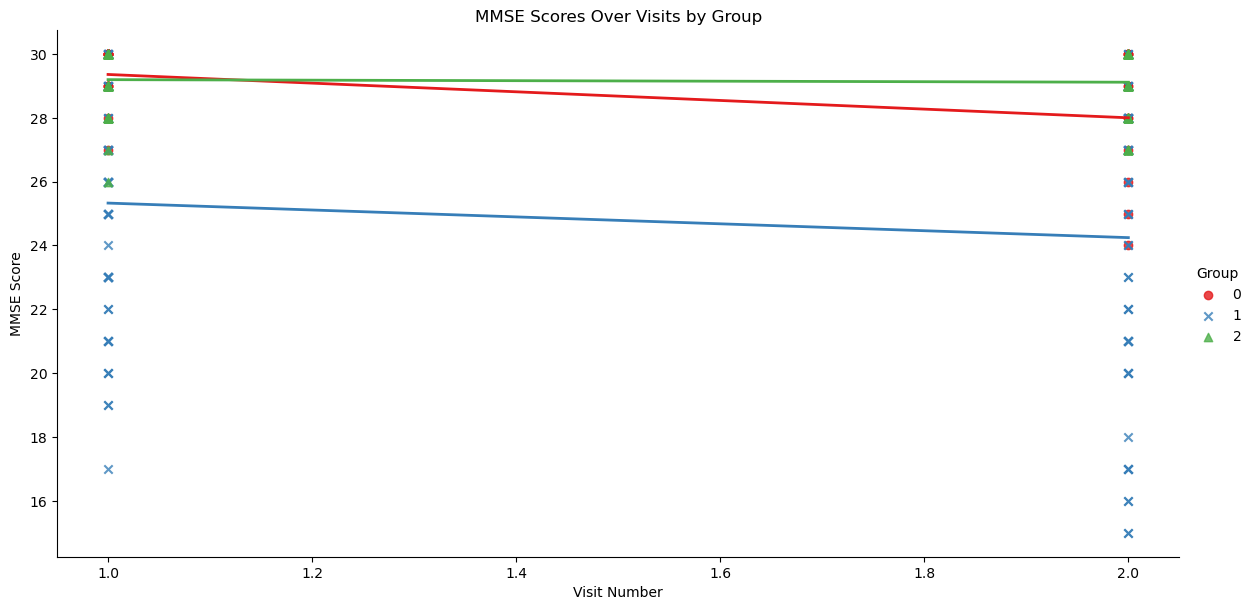

In [7]:
# Ensure 'Group' is a string to work correctly with seaborn
data_clean['Group'] = data_clean['Group'].astype('category')

# Find unique levels in 'Group'
unique_groups = data_clean['Group'].unique()
num_groups = len(unique_groups)

# Define markers based on the number of groups
# Adjust this list if you have more than 3 groups
markers_list = ['o', 'x', '^', 's', 'D', '+'][:num_groups]

# Create the interaction plot 
sns.lmplot(x="Visit", y="MMSE", hue="Group", data=data_clean, 
           palette='Set1', height=6, aspect=2, markers=markers_list, 
           ci=None, line_kws={'linewidth': 2})
plt.title('MMSE Scores Over Visits by Group')
plt.xlabel('Visit Number')
plt.ylabel('MMSE Score')
plt.show()


In [18]:
#checking assumption
#mauchly's test of sphericity
pg.sphericity(dv='MMSE', within='Visit', subject='Subject ID', data=data)[-1]

1.0

In [14]:
# Extract residuals
residuals = model1.resid  
residuals1 = model2.resid
# Test for normality of model 1 and 2
normality_test = pg.normality(residuals)
normality_test1 = pg.normality(residuals1)
# Test of normalty of two-way mixed ANOVA
normality_test2 = pg.normality(data=data, dv='MMSE', group='Subject ID')
print(normality_test)
print(normality_test1)
print(normality_test2)

          W          pval  normal
0  0.941692  2.337238e-09   False
          W          pval  normal
0  0.945364  5.787738e-09   False
             W  pval  normal
Subject ID                  
OAS2_0001  NaN   NaN   False
OAS2_0002  NaN   NaN   False
OAS2_0004  NaN   NaN   False
OAS2_0005  NaN   NaN   False
OAS2_0007  NaN   NaN   False
...         ..   ...     ...
OAS2_0182  NaN   NaN   False
OAS2_0183  NaN   NaN   False
OAS2_0184  NaN   NaN   False
OAS2_0185  NaN   NaN   False
OAS2_0186  NaN   NaN   False

[150 rows x 3 columns]


/opt/conda/lib/python3.11/site-packages/pingouin/distribution.py:242: UserWarning: Group OAS2_0001 has less than 4 valid samples. Returning NaN.
  warnings.warn(f"Group {idx} has less than 4 valid samples. Returning NaN.")
/opt/conda/lib/python3.11/site-packages/pingouin/distribution.py:242: UserWarning: Group OAS2_0002 has less than 4 valid samples. Returning NaN.
  warnings.warn(f"Group {idx} has less than 4 valid samples. Returning NaN.")
/opt/conda/lib/python3.11/site-packages/pingouin/distribution.py:242: UserWarning: Group OAS2_0004 has less than 4 valid samples. Returning NaN.
  warnings.warn(f"Group {idx} has less than 4 valid samples. Returning NaN.")
/opt/conda/lib/python3.11/site-packages/pingouin/distribution.py:242: UserWarning: Group OAS2_0005 has less than 4 valid samples. Returning NaN.
  warnings.warn(f"Group {idx} has less than 4 valid samples. Returning NaN.")
/opt/conda/lib/python3.11/site-packages/pingouin/distribution.py:242: UserWarning: Group OAS2_0007 has less 

In [24]:
# Due to the result of normalty of two-way mixed ANOVA contain 'NaN'AND 'False', which means above tests may not 
# suitable. so let's use Q-Q plot and hist to do further analysis
# Drop rows with NaN values in the columns used in the model, if any
data = data.dropna(subset=['MMSE', 'Visit', 'Group', 'Subject ID'])

In [25]:
# Reset the index of the DataFrame to match the row indices
data.reset_index(drop=True, inplace=True)

In [26]:
# Convert 'Visit' and 'Group' to categorical if they're not already
data['Visit'] = data['Visit'].astype('category')
data['Group'] = data['Group'].astype('category')

/tmp/ipykernel_98/3152539228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Visit'] = data['Visit'].astype('category')
/tmp/ipykernel_98/3152539228.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Group'] = data['Group'].astype('category')


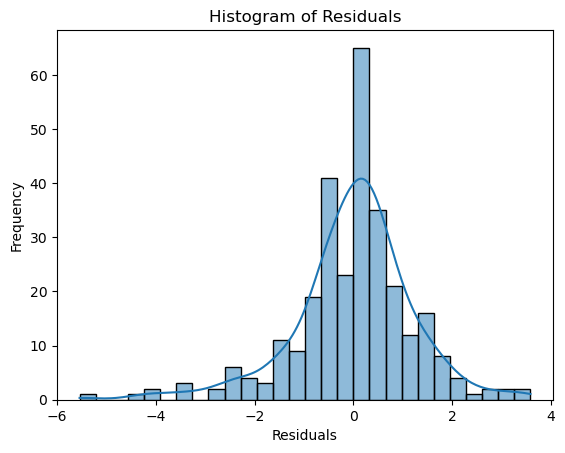

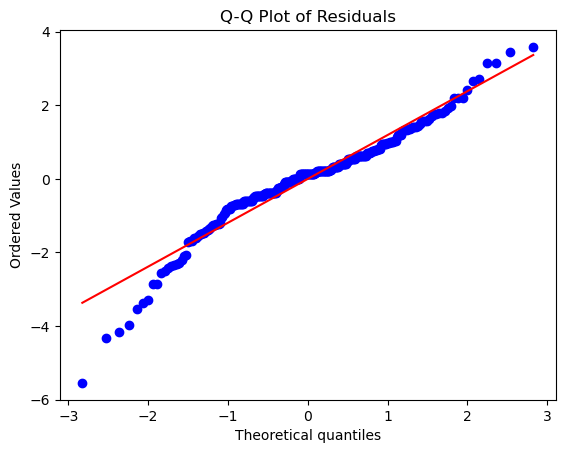

In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Fit a mixed-effects model
model = smf.mixedlm("MMSE ~ Visit * C(Group)", data, groups=data['Subject ID']).fit()

# Extract the residuals
residuals = model.resid

# Histogram of residuals
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot of residuals
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


In [29]:
from statsmodels.stats.power import TTestIndPower
import numpy as np

The required sample size for a power of 0.91, alpha of 0.05, and effect size of 0.7 is 45.45 per group.


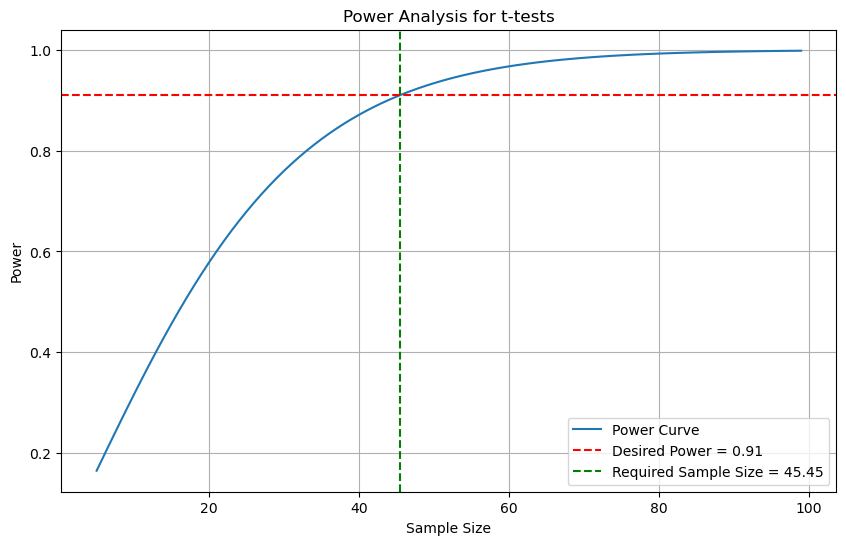

In [30]:
# Parameters for power analysis
effect_size = 0.7  
alpha = 0.05  
power = 0.91 

# Create a power analysis object
power_analysis = TTestIndPower()

# Calculate the sample size needed for the given parameters
sample_size = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power)
print(f"The required sample size for a power of {power}, alpha of {alpha}, and effect size of {effect_size} is {sample_size:.2f} per group.")

# Create a range of sample sizes to calculate power for
sample_sizes = np.arange(5, 100)

# Calculate power for these sample sizes
powers = power_analysis.solve_power(effect_size=effect_size, nobs1=sample_sizes, alpha=alpha)

# Plot the power analysis
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, powers, label='Power Curve')
plt.axhline(y=power, color='red', linestyle='--', label=f'Desired Power = {power}')
plt.axvline(x=sample_size, color='green', linestyle='--', label=f'Required Sample Size = {sample_size:.2f}')
plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.title('Power Analysis for t-tests')
plt.legend()
plt.grid(True)
plt.show()